Import Libraries

In [2]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.0 MB/s 
     |████████████████████████████████| 19.2 MB 236 kB/s 
     |████████████████████████████████| 240 kB 59.6 MB/s 
     |████████████████████████████████| 55 kB 3.2 MB/s 
     |████████████████████████████████| 112 kB 52.6 MB/s 
     |████████████████████████████████| 943 kB 56.5 MB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 37.5 MB 46 kB/s 
     |████████████████████████████████| 4.0 MB 39.0 MB/s 
     |████████████████████████████████| 1.9 MB 44.7 MB/s 
     |████████████████████████████████| 112 kB 52.3 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.0-py3-none-any.whl size=12188 sha256=9a53b2b145b48b618152b93dbf8fc5b0118f9520db09a4cb23c2a049c63a1db0
  Stored in directory: /root/.cache/pip/wheels/63/d0/9a/257143

In [3]:
from sklearn import model_selection, datasets, svm
from qiskit import QuantumCircuit, Aer, IBMQ, QuantumRegister, ClassicalRegister

In [4]:
iris = datasets.load_iris()

Train/Test - 67/33

In [5]:
X = iris.data[0:100]
y = iris.target[0:100]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.33, random_state = 42) 

In [6]:
y_train

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1])

In [9]:
X_train[4]

array([6.7, 3.1, 4.4, 1.4])

In [10]:
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 4.7 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=64c93090fd0f21470f1e3ecf0013450851984c3a47ede0a4c143589e427de2c8
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


Quantum Circuits
*   4 features from the dataset represented into 4 qubits. {q00, q01, q10, q11}
*   1 classical register, c(output)

In [12]:
n = 4
q = QuantumRegister(n)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
print(qc)

      
q1_0: 
      
q1_1: 
      
q1_2: 
      
q1_3: 
      
  c1: 
      


Rotating the qubits around by these angles
* This rotates the qubits and then encodes those classical numbers onto the qubits (this can be done more complicated ways)

* Rotating the qubits is really just the simplest way of getting the data onto the quantum processor



In [17]:
q = QuantumRegister(n)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

for i, x in enumerate(X_train[0]):
    qc.rx(x, i)
print(qc)

      ┌─────────┐
q6_0: ┤ Rx(5.2) ├
      ├─────────┤
q6_1: ┤ Rx(3.4) ├
      ├─────────┤
q6_2: ┤ Rx(1.4) ├
      ├─────────┤
q6_3: ┤ Rx(0.2) ├
      └─────────┘
  c6: ═══════════
                 


Feature map, mapping any data onto the quantum processor.

In [18]:
def feature_map(X):
    q = QuantumRegister(n)
    c = ClassicalRegister(1)
    qc = QuantumCircuit(q,c)
    for i, x in enumerate(X):
        qc.rx(x, i)
    return qc, c 

* We need to get measure quantum circuit, we need to get output
* This measurement is going to be our prediction of the quantum circuit

In [19]:
qc, c= feature_map(X_train[5])
# measurement operator
qc.measure(0,c)
print(qc)

       ┌───────┐ ┌─┐
q7_0: ─┤ Rx(5) ├─┤M├
      ┌┴───────┴┐└╥┘
q7_1: ┤ Rx(3.2) ├─╫─
      ├─────────┤ ║ 
q7_2: ┤ Rx(1.2) ├─╫─
      ├─────────┤ ║ 
q7_3: ┤ Rx(0.2) ├─╫─
      └─────────┘ ║ 
  c7: ════════════╩═
                    


* The output can be either 0 or 1
* I want to introduce variational circuit,
* I want to introduce more rotations that we are getting gonna be learning

In [20]:
qc, c =feature_map(X_train[5])
qc.barrier()
qc.barrier()
# measurement operator
qc.measure(0,c)
print(qc)

       ┌───────┐  ░  ░ ┌─┐
q8_0: ─┤ Rx(5) ├──░──░─┤M├
      ┌┴───────┴┐ ░  ░ └╥┘
q8_1: ┤ Rx(3.2) ├─░──░──╫─
      ├─────────┤ ░  ░  ║ 
q8_2: ┤ Rx(1.2) ├─░──░──╫─
      ├─────────┤ ░  ░  ║ 
q8_3: ┤ Rx(0.2) ├─░──░──╫─
      └─────────┘ ░  ░  ║ 
  c8: ══════════════════╩═
                          


* In between those gray lines ı want to put some more rotations.
* These rotations will have angles that we want to learn, we want to optimize those angles such that the quantum circuit then predict the right label (0 or 1 ).

In [22]:
# right label in our case =>
print(y_train[5])

0


Variational Circuits
* Variational circuits contains rotations.
* I have put just random angles for illustration
* The goal is now that we want to learn those angles we want to learn optimal angles such that our quantum circuit outputs us right class
* Blue line are c not gates. they create entanglement, so they essentially allow information to travel from one qubit to another
* I am measuring here the zeroth cubit (for output)

In [23]:
def variational_circuit(qc, theta):
      for i in range(n-1):
            qc.cnot(i,i+1)
      qc.cnot(n-1, 0)
      for i in range(n):
            qc.ry(theta[i], i)
      return qc

In [24]:
import numpy as np
qc, c =feature_map(X_train[5])
qc.barrier()
qc = variational_circuit(qc, np.random.rand(N))
qc.barrier()
# measurement operator
qc.measure(0,c)
print(qc)

       ┌───────┐  ░                          ┌───┐┌─────────────┐ ░ ┌─┐
q9_0: ─┤ Rx(5) ├──░───■──────────────────────┤ X ├┤ Ry(0.99797) ├─░─┤M├
      ┌┴───────┴┐ ░ ┌─┴─┐     ┌─────────────┐└─┬─┘└─────────────┘ ░ └╥┘
q9_1: ┤ Rx(3.2) ├─░─┤ X ├──■──┤ Ry(0.94486) ├──┼──────────────────░──╫─
      ├─────────┤ ░ └───┘┌─┴─┐└─────────────┘  │  ┌─────────────┐ ░  ║ 
q9_2: ┤ Rx(1.2) ├─░──────┤ X ├───────■─────────┼──┤ Ry(0.36943) ├─░──╫─
      ├─────────┤ ░      └───┘     ┌─┴─┐       │  ├─────────────┤ ░  ║ 
q9_3: ┤ Rx(0.2) ├─░────────────────┤ X ├───────■──┤ Ry(0.79241) ├─░──╫─
      └─────────┘ ░                └───┘          └─────────────┘ ░  ║ 
  c9: ═══════════════════════════════════════════════════════════════╩═
                                                                       


Output

In [25]:
import qiskit 
qc, c = feature_map(X_train[5])
qc.barrier()
qc = variational_circuit(qc, np.random.rand(n))
qc.barrier()
# measurement operator
qc.measure(0,c)
shots = 10000
backend = Aer.get_backend("qasm_simulator")
job = qiskit.execute(qc, backend, shots=shots)
result = job.result()
counts = result.get_counts(qc)
print(counts)
print(counts["1"]/shots)
print(qc)

{'0': 3748, '1': 6252}
0.6252
        ┌───────┐  ░                          ┌───┐┌─────────────┐ ░ ┌─┐
q10_0: ─┤ Rx(5) ├──░───■──────────────────────┤ X ├┤ Ry(0.79296) ├─░─┤M├
       ┌┴───────┴┐ ░ ┌─┴─┐     ┌─────────────┐└─┬─┘└─────────────┘ ░ └╥┘
q10_1: ┤ Rx(3.2) ├─░─┤ X ├──■──┤ Ry(0.51303) ├──┼──────────────────░──╫─
       ├─────────┤ ░ └───┘┌─┴─┐└─────────────┘  │  ┌─────────────┐ ░  ║ 
q10_2: ┤ Rx(1.2) ├─░──────┤ X ├───────■─────────┼──┤ Ry(0.26614) ├─░──╫─
       ├─────────┤ ░      └───┘     ┌─┴─┐       │  ├─────────────┤ ░  ║ 
q10_3: ┤ Rx(0.2) ├─░────────────────┤ X ├───────■──┤ Ry(0.92744) ├─░──╫─
       └─────────┘ ░                └───┘          └─────────────┘ ░  ║ 
  c10: ═══════════════════════════════════════════════════════════════╩═
                                                                        


* Run quantum circuits 10000 times, ı have run it on quantum simulator "qasm_simulator" which simulates the quantum computer without any errors
* The prediction of this quantum circuit is 1
* But real => 0

In [27]:
print(y_train[5])

0


This make total sense because we have not train angles (thetas) yet. they are just random values.

Quantum Neural Network Function

In [28]:
def quantum_nn(X, theta, simulator=True):

    qc, c = feature_map(X)
    qc = variational_circuit(qc, theta)
    qc.measure(0,c)

    shots = 154
    backend = Aer.get_backend("qasm_simulator")
    job = qiskit.execute(qc, backend, shots=shots)
    result = job.result()
    counts = result.get_counts(qc)
    return counts["1"]/shots

* Quantum Neural Network Function returns us a prediction in our case => 1
* right class => 0

In [29]:
prediction = quantum_nn(X_train[5], np.random.rand(N))
prediction

0.66

In [31]:
target = y_train[5]
target

0

* How good are prediction is =>
* We want to minimize this loss function

In [32]:
(target - prediction)**2

0.43560000000000004

In [34]:
def loss(prediction, target):
      return (target - prediction)**2

loss(prediction, target)

0.43560000000000004

**Stochastic gradient descent rule -**
* We want to minimize this loss function to do that;
* We need to loop over our training data then,
* We need to update our variational parameters
* We're gonna loop through our training data and
* For every training data example, we're gonna get the prediction of our quantum neural network
* We will then plug this into our loss function which tells us how far our prediction is away from the true value
* And then , we're gonna be using this information to update the theta (our variational parameters in the variational circuits)
* The gradient is essentially just taking the derivative of the loss function with respect to every entry in this theta vector here.
* Eta is called learning rate
* Eta is called hyper parameter

In [35]:
import copy

def gradient(X, Y, theta):
      delta = 0.01
      grad = []
      for i in range(len(theta)):
          dtheta = copy.copy(theta)
          dtheta[i] += delta
          pred1 = quantum_nn(X, dtheta)
          pred2 = quantum_nn(X, theta)
          # finite difference
          grad.append( (loss(pred1, Y)-loss(pred2, Y))/ delta)
      return np.array(grad)

* The way ı am calculating a derivative is using finite difference
* Finite difference: you just evaluate loss function for dtheta, then you substruct the loss function evaluated at theta and divide by small value (delta)
* We are doing for every theta value and return gradient vector

In [37]:
def accuracy(X, Y, theta):
      counter = 0
      for X_i, Y_i in zip(X, Y):
          prediction = quantum_nn(X_i, theta)
          if prediction < 0.5 and Y_i == 0:
               counter +=1
          elif prediction >= 0.5 and Y_i == 1:
               counter +=1
      return counter/len(Y)

Training Accuracy

In [39]:
eta = 0.05 

loss_list = []
theta = np.ones(N)

print("Epoch \t Loss \t Tranining Accuracy")

# training epoch 
for i in range(20):

    loss_tmp = []

    for X_i, Y_i in zip(X_train, y_train):

        prediction = quantum_nn(X_i, theta)
        loss_tmp.append(loss(prediction, Y_i))

        # update theta,gradient descent rule
        theta = theta - eta * gradient(X_i, Y_i, theta)
    
    loss_list.append(np.mean(loss_tmp))
    acc = accuracy(X_train, y_train, theta)
    print(f"{i} \t {loss_list[-1]:.3f} \t {acc:.3f}")

Epoch 	 Loss 	 Tranining Accuracy
0 	 0.274 	 0.239
1 	 0.260 	 0.746
2 	 0.236 	 0.836
3 	 0.226 	 0.851
4 	 0.220 	 0.776
5 	 0.233 	 0.836
6 	 0.222 	 0.806
7 	 0.218 	 0.836
8 	 0.220 	 0.836
9 	 0.214 	 0.851
10 	 0.205 	 0.851
11 	 0.204 	 0.836
12 	 0.208 	 0.866
13 	 0.211 	 0.821
14 	 0.205 	 0.851
15 	 0.207 	 0.821
16 	 0.208 	 0.866
17 	 0.211 	 0.821
18 	 0.215 	 0.806
19 	 0.214 	 0.836


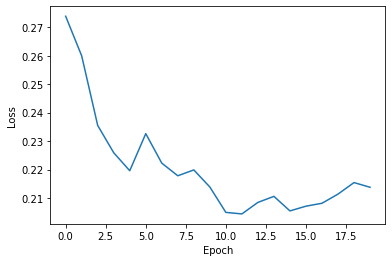

In [40]:
import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

Accuracy on test set

In [41]:
accuracy(X_test, y_test, theta)

0.7575757575757576

Improve accuracy- 
* By training in a bit longer
* Implementing better loss function, variational circuits
* Normalization on the input data